In [1]:
import requests
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
response = requests.get(url)
with open("titanic.csv", "wb") as file:
    file.write(response.content)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Split into 80% train and 20% test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Save the splits to CSV
train_df.to_csv("train2.csv", index=False)
test_df.to_csv("test2.csv", index=False)

In [3]:
#Importing All Required Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings(action='ignore')

In [4]:
#Loading Datasets
pd.set_option('display.max_columns',10,'display.width',1000)
train = pd.read_csv('train2.csv')
test = pd.read_csv('test2.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
0,332,0,1,"Partner, Mr. Austen",male,...,0,113043,28.5000,C124,S
1,734,0,2,"Berriman, Mr. William John",male,...,0,28425,13.0000,NaN,S
2,383,0,3,"Tikkanen, Mr. Juho",male,...,0,STON/O 2. 3101293,7.9250,NaN,S
3,705,0,3,"Hansen, Mr. Henrik Juul",male,...,0,350025,7.8542,NaN,S
4,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,...,2,347082,31.2750,NaN,S


In [5]:
#Display shape
train.shape

(712, 12)

In [6]:
test.shape

(179, 12)

In [7]:
#Checking for Null values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            140
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          553
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             37
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          134
Embarked         0
dtype: int64

In [9]:
#Description of dataset
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
count,712.000000,712.000000,712.000000,712,712,...,712.000000,712,712.000000,159,710
unique,NaN,NaN,NaN,712,2,...,NaN,558,NaN,117,3
top,NaN,NaN,NaN,"White, Mr. Richard Frasar",male,...,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,467,...,NaN,7,NaN,4,525
mean,448.234551,0.376404,2.330056,NaN,NaN,...,0.379213,NaN,32.586276,NaN,NaN
std,256.731423,0.484824,0.824584,NaN,NaN,...,0.791669,NaN,51.969529,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,...,0.000000,NaN,0.000000,NaN,NaN
25%,224.750000,0.000000,2.000000,NaN,NaN,...,0.000000,NaN,7.925000,NaN,NaN
50%,453.500000,0.000000,3.000000,NaN,NaN,...,0.000000,NaN,14.454200,NaN,NaN
75%,673.500000,1.000000,3.000000,NaN,NaN,...,0.000000,NaN,30.500000,NaN,NaN


In [12]:
train.groupby('Survived').mean()train.groupby('Survived').mean(numeric_only=True)

SyntaxError: invalid syntax (1153326227.py, line 1)

In [15]:
train.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.019979,-0.046175,0.032565,-0.069226,-0.000217,0.025517
Survived,0.019979,1.000000,-0.321750,-0.059695,-0.047602,0.078311,0.246641
Pclass,-0.046175,-0.321750,1.000000,-0.355950,0.086933,0.012679,-0.546794
Age,0.032565,-0.059695,-0.355950,1.000000,-0.320916,-0.207040,0.088103
SibSp,-0.069226,-0.047602,0.086933,-0.320916,1.000000,0.440355,0.153011
Parch,-0.000217,0.078311,0.012679,-0.207040,0.440355,1.000000,0.222180
Fare,0.025517,0.246641,-0.546794,0.088103,0.153011,0.222180,1.000000


In [16]:
male_ind = len(train[train['Sex'] == 'male'])
print("No of Males in Titanic:",male_ind)

No of Males in Titanic: 467


In [17]:
female_ind = len(train[train['Sex'] == 'female'])
print("No of Females in Titanic:",female_ind)

No of Females in Titanic: 245


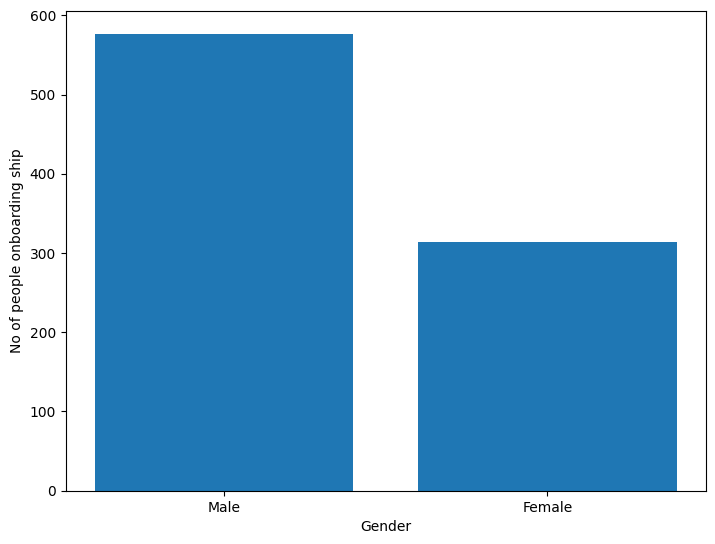

In [18]:
#Plotting
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male','Female']
index = [577,314]
ax.bar(gender,index)
plt.xlabel("Gender")
plt.ylabel("No of people onboarding ship")
plt.show()

In [19]:
alive = len(train[train['Survived'] == 1])
dead = len(train[train['Survived'] == 0])

In [20]:
train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.738776
male,0.186296


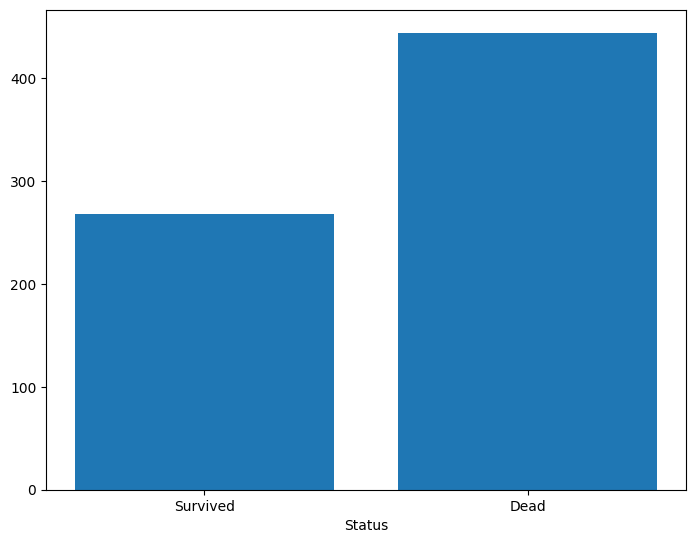

In [21]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
status = ['Survived','Dead']
ind = [alive,dead]
ax.bar(status,ind)
plt.xlabel("Status")
plt.show()

Text(0.5, 1.0, "Bar graph of people accrding to ticket class in which people couldn't survive")

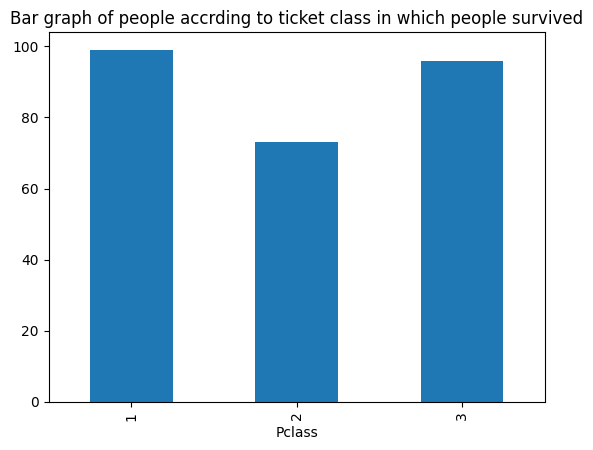

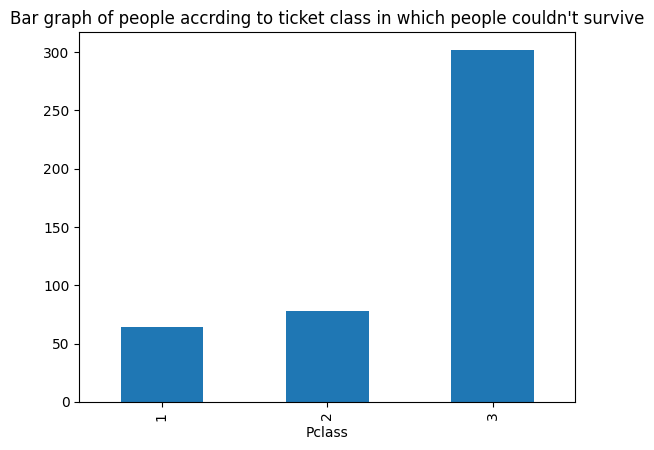

In [22]:
plt.figure(1)
train.loc[train['Survived'] == 1, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Bar graph of people accrding to ticket class in which people survived')


plt.figure(2)
train.loc[train['Survived'] == 0, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Bar graph of people accrding to ticket class in which people couldn\'t survive')

([<matplotlib.axis.XTick at 0x154528964b0>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90')])

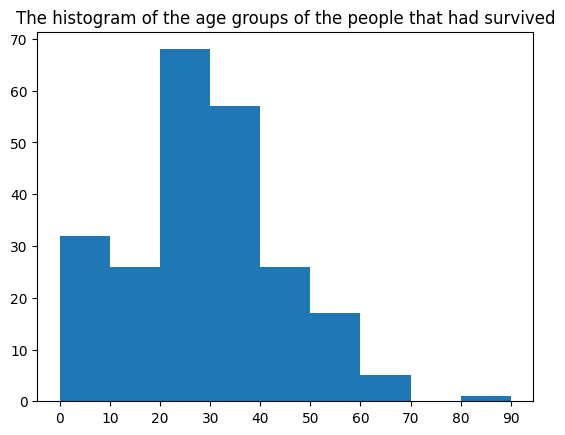

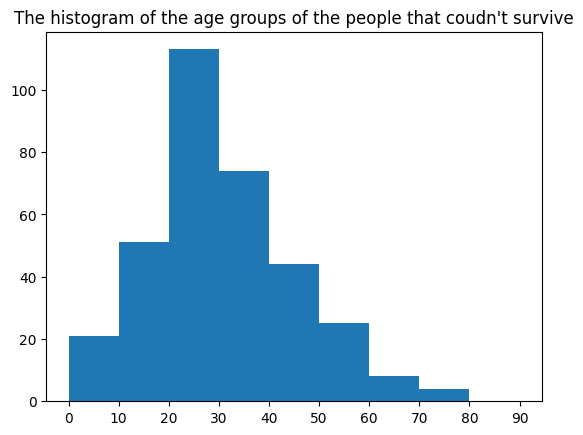

In [23]:
plt.figure(1)
age  = train.loc[train.Survived == 1, 'Age']
plt.title('The histogram of the age groups of the people that had survived')
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))


plt.figure(2)
age  = train.loc[train.Survived == 0, 'Age']
plt.title('The histogram of the age groups of the people that coudn\'t survive')
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))

In [24]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.506098
2,2,0.478261
0,0,0.345041
3,3,0.307692
4,4,0.187500
5,5,0.000000
6,8,0.000000


In [25]:
train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.607362
1,2,0.483444
2,3,0.241206


In [26]:
train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Age', ascending=True)

,Age,Survived
0,0.42,1.0
1,0.67,1.0
2,0.75,1.0
3,0.83,1.0
4,0.92,1.0
...,...,...
78,65.00,0.0
79,70.00,0.0
80,70.50,0.0
81,74.00,0.0


In [27]:
train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.544000
1,Q,0.366667
2,S,0.335238


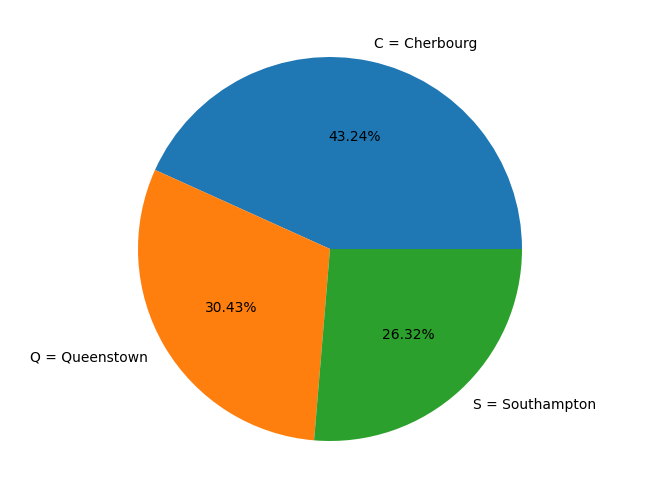

In [28]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['C = Cherbourg', 'Q = Queenstown', 'S = Southampton']
s = [0.553571,0.389610,0.336957]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

In [29]:
test.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
count,179.000000,179.000000,179.000000,179,179,...,179.000000,179,179.000000,45,179
unique,NaN,NaN,NaN,179,2,...,NaN,169,NaN,42,3
top,NaN,NaN,NaN,"Moubarek, Master. Halim Gonios (""William George"")",male,...,NaN,347088,NaN,D,S
freq,NaN,NaN,NaN,1,110,...,NaN,3,NaN,2,119
mean,437.111732,0.413408,2.223464,NaN,NaN,...,0.391061,NaN,30.684473,NaN,NaN
std,260.349331,0.493826,0.877501,NaN,NaN,...,0.863185,NaN,39.447725,NaN,NaN
min,6.000000,0.000000,1.000000,NaN,NaN,...,0.000000,NaN,0.000000,NaN,NaN
25%,217.500000,0.000000,1.000000,NaN,NaN,...,0.000000,NaN,7.895800,NaN,NaN
50%,423.000000,0.000000,3.000000,NaN,NaN,...,0.000000,NaN,14.500000,NaN,NaN
75%,656.000000,1.000000,3.000000,NaN,NaN,...,0.000000,NaN,32.410400,NaN,NaN


In [30]:
#Droping Useless Columns
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

In [31]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

In [32]:
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [33]:
#Feature Selection
column_train=['Age','Pclass','SibSp','Parch','Fare','Sex','Embarked']
#training values
X=train[column_train]
#target value
Y=train['Survived']

In [34]:
X['Age'].isnull().sum()
X['Pclass'].isnull().sum()
X['SibSp'].isnull().sum()
X['Parch'].isnull().sum()
X['Fare'].isnull().sum()
X['Sex'].isnull().sum()
X['Embarked'].isnull().sum()

np.int64(2)

In [35]:
#now we have to fill all the missing values
#age have 177  missing values
#either we fill missing values with mean or median form existing values 
X['Age']=X['Age'].fillna(X['Age'].median())
X['Age'].isnull().sum()

np.int64(0)

In [36]:
X['Embarked'] = train['Embarked'].fillna(method ='pad')
X['Embarked'].isnull().sum()

np.int64(0)

In [37]:
#now we need to convert sex into integer value 
d={'male':0, 'female':1}
X['Sex']=X['Sex'].apply(lambda x:d[x])
X['Sex'].head()

0    0
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

In [38]:
e={'C':0, 'Q':1 ,'S':2}
X['Embarked']=X['Embarked'].apply(lambda x:e[x])
X['Embarked'].head()

0    2
1    2
2    2
3    2
4    2
Name: Embarked, dtype: int64

In [39]:
#Training Testing and Spliting the model
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

In [40]:
#Using LogisticRegression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.7663551401869159


In [41]:
#Confusion Matrix
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_mat = confusion_matrix(Y_test,Y_pred)
print(confusion_mat)

[[120  19]
 [ 31  44]]


In [42]:
#Using Support Vector
from sklearn.svm import SVC
model1 = SVC()
model1.fit(X_train,Y_train)

pred_y = model1.predict(X_test)

from sklearn.metrics import accuracy_score
print("Acc=",accuracy_score(Y_test,pred_y))

Acc= 0.6962616822429907


In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,pred_y)
print(confusion_mat)
print(classification_report(Y_test,pred_y))

[[128  11]
 [ 54  21]]
              precision    recall  f1-score   support

           0       0.70      0.92      0.80       139
           1       0.66      0.28      0.39        75

    accuracy                           0.70       214
   macro avg       0.68      0.60      0.60       214
weighted avg       0.69      0.70      0.66       214



In [44]:
#Using KNN Neighbors
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train,Y_train)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred2))

Accuracy Score: 0.7336448598130841


In [46]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,y_pred2)
print(confusion_mat)
print(classification_report(Y_test,y_pred2))

[[111  28]
 [ 29  46]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       139
           1       0.62      0.61      0.62        75

    accuracy                           0.73       214
   macro avg       0.71      0.71      0.71       214
weighted avg       0.73      0.73      0.73       214



In [47]:
#Using GaussianNB
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,Y_train)
y_pred3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred3))

Accuracy Score: 0.7570093457943925


In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,y_pred3)
print(confusion_mat)
print(classification_report(Y_test,y_pred3))

[[113  26]
 [ 26  49]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       139
           1       0.65      0.65      0.65        75

    accuracy                           0.76       214
   macro avg       0.73      0.73      0.73       214
weighted avg       0.76      0.76      0.76       214



In [49]:
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(X_train,Y_train)
y_pred4 = model4.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred4))

Accuracy Score: 0.7383177570093458


In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,y_pred4)
print(confusion_mat)
print(classification_report(Y_test,y_pred4))

[[108  31]
 [ 25  50]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       139
           1       0.62      0.67      0.64        75

    accuracy                           0.74       214
   macro avg       0.71      0.72      0.72       214
weighted avg       0.74      0.74      0.74       214



In [51]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'Naive Bayes','KNN' ,'Decision Tree'],
    'Score': [0.75,0.66,0.76,0.66,0.74]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.76,Naive Bayes
0.75,Logistic Regression
0.74,Decision Tree
0.66,Support Vector Machines
0.66,KNN


In [52]:
#Hence I will use Naive Bayes algorithms for training my model.
#This project was completely made by Amber Kakkar under Project Based Learning at ICT Academy IIT Kanpur